# Perla Bot | Analytics
## Correlational and inferential analysis
### Perla beta 2, Aug 2020, raul@psicobotica.com 

<hr>
About Perla: <a herf="https://www.psicobotica.com/productos/psicologia-clinica/psicobotica-perla/">Perla Homepage at Psicobōtica</a>
<hr> 


## Dataset with classes - load from file
(direct load from github)



In [1]:
# Loading the table (CSV)

import pandas as pd 

# Using beta 2 dataset 3 version (with classses): 
perla_dataset_path = "https://raw.githubusercontent.com/raul-arrabales/perla-bot/master/data/Perla-beta2-ds3-classes.csv"

perla_df = pd.read_csv(perla_dataset_path, header=0, delimiter=";") 

In [2]:
# Checking data load
perla_df.head()

,PI1,PI2,PI3,PI4,PI5,PI6,PI7,PI8,PI9,PPHQ9,...,I6,I7,I8,I9,Gender,Age,Code,Delay,PDepressed,Depressed
0,0,1,0,2,0,0,0,0,0,3,...,0,0,0,0,2,44,4ba596c4aefd8188d00162bfef57967c,0,0,0
1,0,3,3,3,0,3,0,0,0,12,...,3,0,0,0,1,43,fef2bf388aa21eace80757369757689c,1,1,1
2,1,1,1,1,1,0,0,0,0,5,...,0,0,0,0,2,39,00feb0b1986f985dab9ba216069c7bfe,2,0,0
3,0,0,1,0,0,0,1,0,0,2,...,0,0,0,0,2,37,b712daeaf10b3aac08eb2a88bae125eb,1,0,0
4,0,0,0,1,0,1,0,0,0,2,...,1,0,0,0,1,43,608af5455da8c250a87f81a5ed5c1942,1,0,0


In [3]:
# Checking types
perla_df.dtypes

PI1            int64
PI2            int64
PI3            int64
PI4            int64
PI5            int64
PI6            int64
PI7            int64
PI8            int64
PI9            int64
PPHQ9          int64
PHQ9           int64
I1             int64
I2             int64
I3             int64
I4             int64
I5             int64
I6             int64
I7             int64
I8             int64
I9             int64
Gender         int64
Age            int64
Code          object
Delay          int64
PDepressed     int64
Depressed      int64
dtype: object

In [4]:
# Check number of qualified successfully anonymized participants
perla_df.Code.count()

108

In [5]:
# Check Nulls and NaNs
perla_df[perla_df.isnull().any(axis=1)]

,PI1,PI2,PI3,PI4,PI5,PI6,PI7,PI8,PI9,PPHQ9,...,I6,I7,I8,I9,Gender,Age,Code,Delay,PDepressed,Depressed


## Correlational analysis
Considering items scores as continuous variables

In [6]:
import seaborn as sns
import numpy as np
from scipy.stats import f_oneway

import matplotlib.pyplot as plt

### Items correlation

In [7]:
# Correlation matrix for items
# PI(x) are the PHQ-9 items reported by Perla.
# I(x) are the PHQ-9 items self-reported.
items_corr = perla_df[["PI1", "PI2", "PI3", "PI4", "PI5", "PI6", "PI7", "PI8", "PI9",
                      "I1", "I2", "I3", "I4", "I5", "I6", "I7", "I8", "I9"]].corr()

In [8]:
items_corr

,PI1,PI2,PI3,PI4,PI5,PI6,PI7,PI8,PI9,I1,I2,I3,I4,I5,I6,I7,I8,I9
PI1,1.000000,0.570383,0.268084,0.477970,0.315552,0.461331,0.348453,0.346986,0.371463,0.648774,0.677124,0.342421,0.506993,0.441679,0.579507,0.438064,0.324460,0.368631
PI2,0.570383,1.000000,0.362386,0.406710,0.298109,0.616818,0.135564,0.410627,0.362641,0.458833,0.683872,0.463641,0.549385,0.412595,0.673587,0.353404,0.323145,0.408193
PI3,0.268084,0.362386,1.000000,0.338536,0.082679,0.390772,0.155937,0.276764,0.059914,0.251508,0.410433,0.789213,0.338009,0.306743,0.366209,0.177804,0.149885,0.173152
PI4,0.477970,0.406710,0.338536,1.000000,0.371512,0.545446,0.229304,0.266831,0.176265,0.452402,0.493696,0.341098,0.670296,0.372565,0.554068,0.309250,0.240480,0.152979
PI5,0.315552,0.298109,0.082679,0.371512,1.000000,0.305147,0.226445,0.321459,0.249727,0.216089,0.369378,0.247094,0.406378,0.627432,0.357134,0.370679,0.486973,0.191476
PI6,0.461331,0.616818,0.390772,0.545446,0.305147,1.000000,0.294841,0.405403,0.388040,0.435017,0.602144,0.486682,0.492265,0.509081,0.761859,0.450304,0.317352,0.404654
PI7,0.348453,0.135564,0.155937,0.229304,0.226445,0.294841,1.000000,0.158453,0.280550,0.380491,0.354721,0.112667,0.288258,0.349728,0.370624,0.624765,0.263633,0.335290
PI8,0.346986,0.410627,0.276764,0.266831,0.321459,0.405403,0.158453,1.000000,0.300444,0.274372,0.349073,0.353237,0.374174,0.460323,0.378821,0.299509,0.465562,0.306368
PI9,0.371463,0.362641,0.059914,0.176265,0.249727,0.388040,0.280550,0.300444,1.000000,0.261886,0.541019,0.130464,0.269408,0.297285,0.489158,0.459968,0.450021,0.858035
I1,0.648774,0.458833,0.251508,0.452402,0.216089,0.435017,0.380491,0.274372,0.261886,1.000000,0.625807,0.278532,0.454932,0.270952,0.490984,0.422827,0.281318,0.315184


In [9]:
cm = sns.light_palette("blue", as_cmap=True)
items_corr.style.background_gradient(cmap=cm).set_precision(2)

,PI1,PI2,PI3,PI4,PI5,PI6,PI7,PI8,PI9,I1,I2,I3,I4,I5,I6,I7,I8,I9
PI1,1,0.57,0.27,0.48,0.32,0.46,0.35,0.35,0.37,0.65,0.68,0.34,0.51,0.44,0.58,0.44,0.32,0.37
PI2,0.57,1,0.36,0.41,0.3,0.62,0.14,0.41,0.36,0.46,0.68,0.46,0.55,0.41,0.67,0.35,0.32,0.41
PI3,0.27,0.36,1,0.34,0.083,0.39,0.16,0.28,0.06,0.25,0.41,0.79,0.34,0.31,0.37,0.18,0.15,0.17
PI4,0.48,0.41,0.34,1,0.37,0.55,0.23,0.27,0.18,0.45,0.49,0.34,0.67,0.37,0.55,0.31,0.24,0.15
PI5,0.32,0.3,0.083,0.37,1,0.31,0.23,0.32,0.25,0.22,0.37,0.25,0.41,0.63,0.36,0.37,0.49,0.19
PI6,0.46,0.62,0.39,0.55,0.31,1,0.29,0.41,0.39,0.44,0.6,0.49,0.49,0.51,0.76,0.45,0.32,0.4
PI7,0.35,0.14,0.16,0.23,0.23,0.29,1,0.16,0.28,0.38,0.35,0.11,0.29,0.35,0.37,0.62,0.26,0.34
PI8,0.35,0.41,0.28,0.27,0.32,0.41,0.16,1,0.3,0.27,0.35,0.35,0.37,0.46,0.38,0.3,0.47,0.31
PI9,0.37,0.36,0.06,0.18,0.25,0.39,0.28,0.3,1,0.26,0.54,0.13,0.27,0.3,0.49,0.46,0.45,0.86
I1,0.65,0.46,0.25,0.45,0.22,0.44,0.38,0.27,0.26,1,0.63,0.28,0.45,0.27,0.49,0.42,0.28,0.32


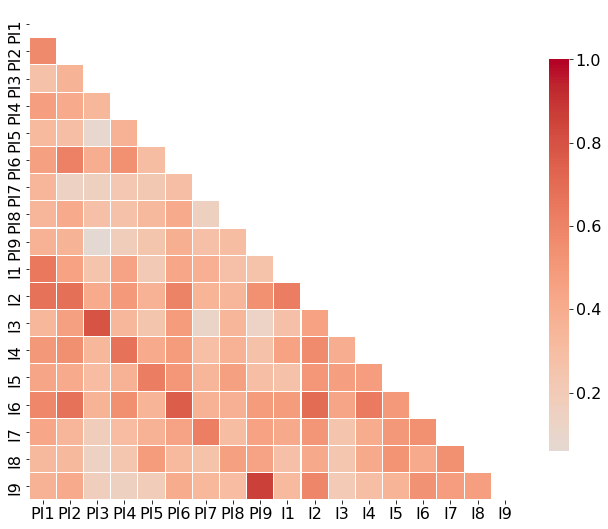

In [31]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(items_corr, dtype=np.bool))

# Set up the matplotlib figure
fig1, ax1 = plt.subplots(figsize=(11, 9))

# cm2 = sns.diverging_palette(380, 1, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(items_corr, mask=mask, cmap='coolwarm', vmax=1, center=0,
            square=True, linewidths=.01, cbar_kws={"shrink": .8})

### Classification Correlation
Considering the dichotimical variable Positive/Negative depression detection

In [11]:
score_corr = perla_df[["PHQ9", "PPHQ9"]].corr()
score_corr

,PHQ9,PPHQ9
PHQ9,1.00000,0.91089
PPHQ9,0.91089,1.00000


In [12]:
score_corr.style.background_gradient(cmap=cm).set_precision(2)

,PHQ9,PPHQ9
PHQ9,1,0.91
PPHQ9,0.91,1


Text(0.5, 1.08, 'PHQ-9 Score correlation (Perla vs. Self-Report)')

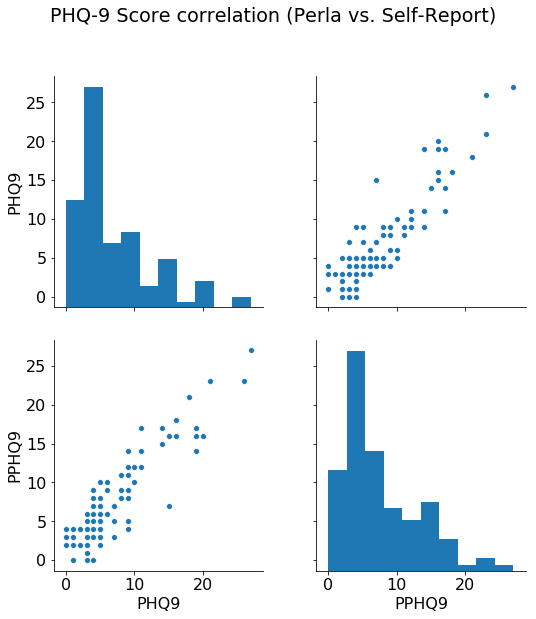

In [29]:
g = sns.pairplot(perla_df[["PHQ9", "PPHQ9"]], height=4)
g.fig.suptitle("PHQ-9 Score correlation (Perla vs. Self-Report)", y=1.08) 

In [14]:
# Point-biserial correlation 
# https://en.wikipedia.org/wiki/Point-biserial_correlation_coefficient 
from scipy import stats

stats.pointbiserialr( perla_df["PDepressed"], perla_df["Depressed"] )

PointbiserialrResult(correlation=0.7931909946770364, pvalue=1.4253889385852636e-24)

In [36]:
for i in range(1, 10):
    print("Point-biserial correlation for item %.1d is: %.2f." % (i, stats.pointbiserialr( perla_df['PI'+str(i)], perla_df['I'+str(i)] )[0]))

Point-biserial correlation for item 1 is: 0.65.
Point-biserial correlation for item 2 is: 0.68.
Point-biserial correlation for item 3 is: 0.79.
Point-biserial correlation for item 4 is: 0.67.
Point-biserial correlation for item 5 is: 0.63.
Point-biserial correlation for item 6 is: 0.76.
Point-biserial correlation for item 7 is: 0.62.
Point-biserial correlation for item 8 is: 0.47.
Point-biserial correlation for item 9 is: 0.86.


In [15]:
# One way ANOVA 
stat, p = f_oneway(perla_df["PDepressed"], perla_df["Depressed"])
print('Depression Screening: Statistics=%.3f, p=%.12f' % (stat, p))
# interpret
alpha = 0.001
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Depression Screening: Statistics=1.191, p=0.276399554493
Same distributions (fail to reject H0)


In [16]:
alpha = 0.001
stat, p = f_oneway(perla_df["PI1"], perla_df["I1"])
print('Item 1: Statistics=%.3f, p=%.12f' % (stat, p))
stat, p = f_oneway(perla_df["PI2"], perla_df["I2"])
print('Item 2: Statistics=%.3f, p=%.12f' % (stat, p))
stat, p = f_oneway(perla_df["PI3"], perla_df["I3"])
print('Item 3: Statistics=%.3f, p=%.12f' % (stat, p))
stat, p = f_oneway(perla_df["PI4"], perla_df["I4"])
print('Item 4: Statistics=%.3f, p=%.12f' % (stat, p))
stat, p = f_oneway(perla_df["PI5"], perla_df["I5"])
print('Item 5: Statistics=%.3f, p=%.12f' % (stat, p))
stat, p = f_oneway(perla_df["PI6"], perla_df["I6"])
print('Item 6: Statistics=%.3f, p=%.12f' % (stat, p))
stat, p = f_oneway(perla_df["PI7"], perla_df["I7"])
print('Item 7: Statistics=%.3f, p=%.12f' % (stat, p))
stat, p = f_oneway(perla_df["PI8"], perla_df["I8"])
print('Item 8: Statistics=%.3f, p=%.12f' % (stat, p))
stat, p = f_oneway(perla_df["PI9"], perla_df["I9"])
print('Item 9: Statistics=%.3f, p=%.12f' % (stat, p))


Item 1: Statistics=0.039, p=0.843066406426
Item 2: Statistics=0.399, p=0.528101864141
Item 3: Statistics=0.099, p=0.753721874125
Item 4: Statistics=0.809, p=0.369284978494
Item 5: Statistics=0.214, p=0.644059336540
Item 6: Statistics=0.122, p=0.727127849406
Item 7: Statistics=1.707, p=0.192801077870
Item 8: Statistics=6.368, p=0.012344833818
Item 9: Statistics=0.444, p=0.505923754651


## Score comparison and score error
### Mean Absolute Error (MAE) and Error distribution

In [17]:
# Adding the absolute score error as a new column
perla_df['Error'] = perla_df.apply(lambda row: abs(row.PPHQ9 - row.PHQ9), axis=1)

In [18]:
# Absolute error statistics
perla_df['Error'].describe()

count    108.000000
mean       1.879630
std        1.616027
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        8.000000
Name: Error, dtype: float64

In [110]:
perla_df['Error1'] = perla_df.apply(lambda row: abs(row.PI1 - row.I1), axis=1)
perla_df['Error2'] = perla_df.apply(lambda row: abs(row.PI2 - row.I2), axis=1)
perla_df['Error3'] = perla_df.apply(lambda row: abs(row.PI3 - row.I3), axis=1)
perla_df['Error4'] = perla_df.apply(lambda row: abs(row.PI4 - row.I4), axis=1)
perla_df['Error5'] = perla_df.apply(lambda row: abs(row.PI5 - row.I5), axis=1)
perla_df['Error6'] = perla_df.apply(lambda row: abs(row.PI6 - row.I6), axis=1)
perla_df['Error7'] = perla_df.apply(lambda row: abs(row.PI7 - row.I7), axis=1)
perla_df['Error8'] = perla_df.apply(lambda row: abs(row.PI8 - row.I8), axis=1)
perla_df['Error9'] = perla_df.apply(lambda row: abs(row.PI9 - row.I9), axis=1)

for i in range(1, 10):
    print("MAE for item %.1d is: %.2f." % (i, perla_df['Error'+str(i)].mean() ))

MAE for item 1 is: 0.49.
MAE for item 2 is: 0.45.
MAE for item 3 is: 0.42.
MAE for item 4 is: 0.47.
MAE for item 5 is: 0.47.
MAE for item 6 is: 0.32.
MAE for item 7 is: 0.53.
MAE for item 8 is: 0.49.
MAE for item 9 is: 0.09.


Text(0.5, 1.0, 'Absolute error distribution')

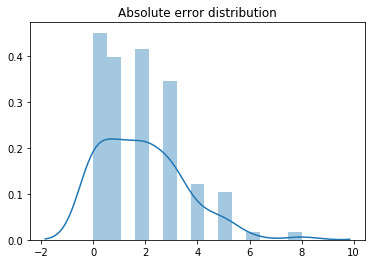

In [19]:
sns.distplot(perla_df[["Error"]], bins=15, kde=True).set_title('Absolute error distribution')

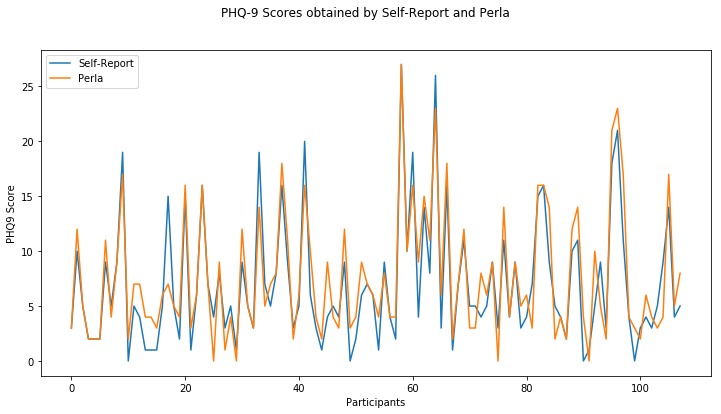

In [20]:
# Visualize as if they were temporal series

fig10, ax10 = plt.subplots(figsize=(12,6))
fig10.suptitle('PHQ-9 Scores obtained by Self-Report and Perla')

ax10.set_ylabel('PHQ9 Score')
ax10.set_xlabel('Participants')

ax10.plot(perla_df['PHQ9'], label='Self-Report')
ax10.plot(perla_df['PPHQ9'], label='Perla')

ax10.legend(loc='upper left', frameon=True)

In [27]:
plt.rcParams.update({'font.size': 16})

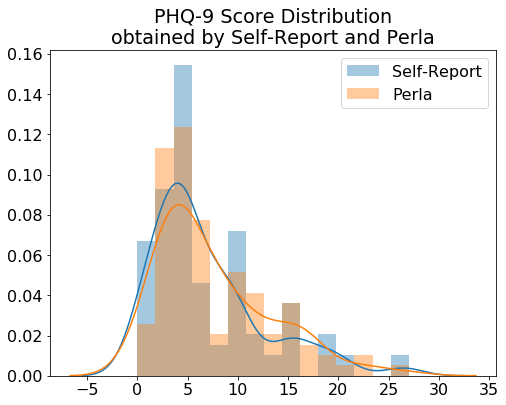

In [30]:
fig11 = plt.subplots(figsize=(8,6))

sns.distplot(perla_df[["PHQ9"]], label='Self-Report', bins=15, kde=True)
sns.distplot(perla_df[["PPHQ9"]], label='Perla', bins=15, kde=True).\
    set_title('PHQ-9 Score Distribution\nobtained by Self-Report and Perla')

plt.legend()

In [22]:
# Mean error calculation

print("Perla mean error is: %.2f points in relation with standard PHQ9 questionnaire." % perla_df['Error'].mean())

Perla mean error is: 1.88 points in relation with standard PHQ9 questionnaire.


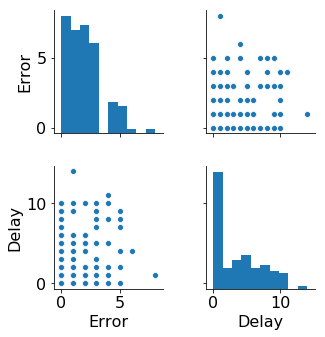

In [32]:
# Does error increase with delay? 
sns.pairplot(perla_df[["Error", "Delay"]])

In [33]:
corr_errdelay = perla_df[["Error", "Delay"]].corr()
corr_errdelay

,Error,Delay
Error,1.000000,0.100203
Delay,0.100203,1.000000


In [34]:
perla_df["Delay"].describe()

count    108.000000
mean       3.712963
std        3.362940
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       14.000000
Name: Delay, dtype: float64

## Evaluation of Perla as Rater 
### Using inter-rater reliability evaluation

Interpretation according to Landis and Koch:<br>
- Values < 0 as indicating no agreement 
- 0–0.20 as slight
- 0.21–0.40 as fair
- 0.41–0.60 as moderate
- 0.61–0.80 as substantial
- 0.81–1 as almost perfect agreement

In [101]:
# Using Cohen Kappa as we only have two raters
from sklearn.metrics import cohen_kappa_score 

cohen_kappa_score( perla_df['PHQ9'], perla_df['PPHQ9'] )


0.18640330730362886

In [102]:
# Kappa Aprox. 0.20 indicated a slight to fair agreement. 

In [103]:
cohen_kappa_score( perla_df['Depressed'], perla_df['PDepressed'] )

0.7816711590296496

In [104]:
# Kappa Aprox. 0.77 indicates substantial agreement. 

In [105]:
for i in range(1, 10):
    print("Kappa for item %.1d is: %.2f." % (i, cohen_kappa_score( perla_df['PI'+str(i)], perla_df['I'+str(i)] )))

Kappa for item 1 is: 0.44.
Kappa for item 2 is: 0.40.
Kappa for item 3 is: 0.48.
Kappa for item 4 is: 0.44.
Kappa for item 5 is: 0.43.
Kappa for item 6 is: 0.57.
Kappa for item 7 is: 0.34.
Kappa for item 8 is: 0.33.
Kappa for item 9 is: 0.73.


## Calculate the reliability of Perla
### Using Cronbach's Alpha


In [64]:
# from https://towardsdatascience.com/cronbachs-alpha-theory-and-application-in-python-d2915dd63586 

def cronbach_alpha(df):
    # 1. Transform the df into a correlation matrix
    df_corr = df.corr()
    
    # 2.1 Calculate N
    # The number of variables equals the number of columns in the df
    N = df.shape[1]
    
    # 2.2 Calculate R
    # For this, we'll loop through the columns and append every
    # relevant correlation to an array calles "r_s". Then, we'll
    # calculate the mean of "r_s"
    rs = np.array([])
    for i, col in enumerate(df_corr.columns):
        sum_ = df_corr[col][i+1:].values
        rs = np.append(sum_, rs)
    mean_r = np.mean(rs)
    
   # 3. Use the formula to calculate Cronbach's Alpha 
    cronbach_alpha = (N * mean_r) / (1 + (N - 1) * mean_r)
    return cronbach_alpha

In [65]:
# Get a df with Perla item scores
perla_items_df = perla_df[['PI1', 'PI2', 'PI3', 'PI4', 'PI5', 'PI6', 'PI7', 'PI8', 'PI9']]

In [66]:
cronbach_alpha(perla_items_df)

0.8101198486795258

In [67]:
# Get a df with self-report PHQ9 item scores
form_items_df = perla_df[['I1', 'I2', 'I3', 'I4', 'I5', 'I6', 'I7', 'I8', 'I9']]
cronbach_alpha(form_items_df)

0.8783321860779236

## Evaluation of Perla as classifier
Using signal detection theory

In [68]:
# Confusion matrix for depression screening

confusion_matrix_perla = pd.crosstab(perla_df['Depressed'], 
                               perla_df['PDepressed'], 
                               rownames=['Actual (PHQ9)'], 
                               colnames=['Predicted (Perla)'])

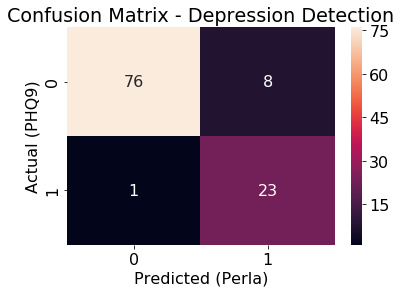

In [115]:
plt.rcParams.update({'font.size': 16})
ax = plt.subplot()
sns.heatmap(confusion_matrix_perla, annot=True, ax = ax)
ax.set_title('Confusion Matrix - Depression Detection'); 

In [70]:
# Confusion matrix statistics: 

from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(perla_df['Depressed'], perla_df['PDepressed']).ravel()
(tn, fp, fn, tp)

(76, 8, 1, 23)

In [114]:
# Specificity (TNR true negative rate)
tnr = tn / (tn + fp)
tnr

0.9047619047619048

In [71]:
# Accuracy of Perla as classifier

from sklearn.metrics import accuracy_score 

# accuracy_score(y_true, y_pred)
acc = accuracy_score(perla_df['Depressed'], perla_df['PDepressed'])
print("The accuracy of Perla is: " + str(acc))

The accuracy of Perla is: 0.9166666666666666


In [72]:
# F1 Score

from sklearn.metrics import f1_score

# f1_score(y_true, y_pred, average='binary')
f1_score(perla_df['Depressed'], perla_df['PDepressed'], average='binary')

0.8363636363636364

In [73]:
# Classification report

from sklearn.metrics import classification_report
target_names = ['No Depression', 'Depression']
print(classification_report(perla_df['Depressed'], perla_df['PDepressed'], target_names=target_names))

               precision    recall  f1-score   support

No Depression       0.99      0.90      0.94        84
   Depression       0.74      0.96      0.84        24

    micro avg       0.92      0.92      0.92       108
    macro avg       0.86      0.93      0.89       108
 weighted avg       0.93      0.92      0.92       108



In [74]:
# AUC - Area under the ROC curve

from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(perla_df['Depressed'], perla_df['PDepressed'])
print(roc_auc)

0.9315476190476191


In [75]:
# Perla probability of depression
# y = 1.017767 + (0.007838154 - 1.017767)/(1 + (x/8.114874)^3.96744)
# 4PL symmetrical sigmoidal

def proba(x):
    return  1.017767 + (0.007838154 - 1.017767)/(1 + (x/8.114874) ** 3.96744)

In [76]:
# Plot ROC curve

from sklearn.metrics import roc_curve

perla_df['probas'] = perla_df.apply(lambda row: proba(row.PPHQ9), axis=1)

fpr, tpr, thresholds = roc_curve(perla_df['Depressed'], perla_df['probas'], pos_label=0)


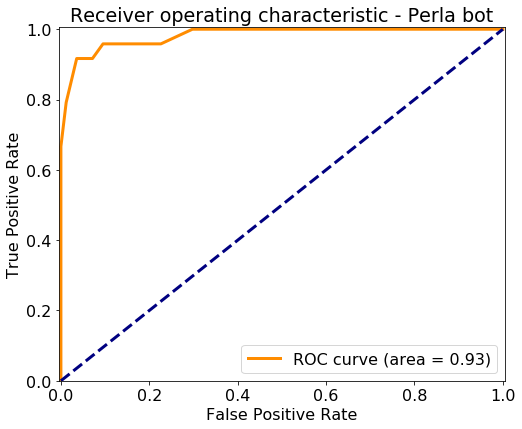

In [77]:
plt.figure(figsize=(8,6.5))
lw = 3

plt.plot(tpr, fpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.005])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic - Perla bot')
plt.legend(loc="lower right")
plt.show()

### Classifier evaluation for each item

In [78]:
confusion_matrix_item1 = pd.crosstab(perla_df['I1'], 
                               perla_df['PI1'], 
                               rownames=['Item 1'], 
                               colnames=['Predicted I1'])

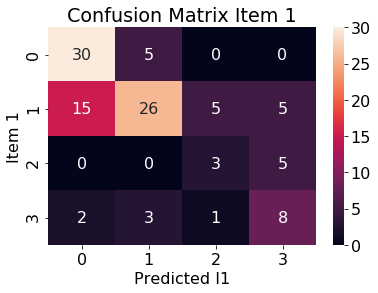

In [79]:
ax1 = plt.subplot()
sns.heatmap(confusion_matrix_item1, annot=True, ax = ax1)
ax1.set_title('Confusion Matrix Item 1');

In [80]:
acc1 = accuracy_score(perla_df['I1'], perla_df['PI1'])
print("The accuracy for item 1 is: " + str(acc1))

The accuracy for item 1 is: 0.6203703703703703


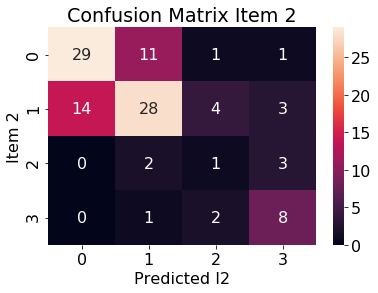

In [81]:
confusion_matrix_item2 = pd.crosstab(perla_df['I2'], 
                               perla_df['PI2'], 
                               rownames=['Item 2'], 
                               colnames=['Predicted I2'])
ax2 = plt.subplot()
sns.heatmap(confusion_matrix_item2, annot=True, ax = ax2)
ax2.set_title('Confusion Matrix Item 2');

In [82]:
acc2 = accuracy_score(perla_df['I2'], perla_df['PI2'])
print("The accuracy for item 2 is: " + str(acc2))

The accuracy for item 2 is: 0.6111111111111112


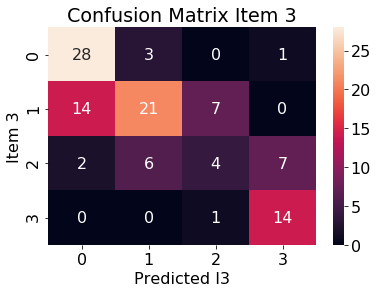

In [83]:
confusion_matrix_item3 = pd.crosstab(perla_df['I3'], 
                               perla_df['PI3'], 
                               rownames=['Item 3'], 
                               colnames=['Predicted I3'])
ax3 = plt.subplot()
sns.heatmap(confusion_matrix_item3, annot=True, ax = ax3)
ax3.set_title('Confusion Matrix Item 3');

In [84]:
acc3 = accuracy_score(perla_df['I3'], perla_df['PI3'])
print("The accuracy for item 3 is: " + str(acc3))

The accuracy for item 3 is: 0.6203703703703703


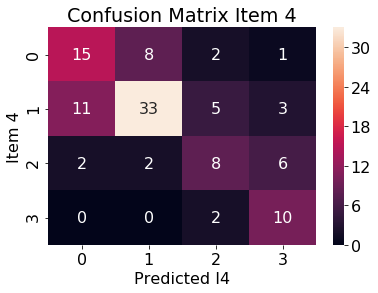

In [85]:
confusion_matrix_item4 = pd.crosstab(perla_df['I4'], 
                               perla_df['PI4'], 
                               rownames=['Item 4'], 
                               colnames=['Predicted I4'])
ax4 = plt.subplot()
sns.heatmap(confusion_matrix_item4, annot=True, ax = ax4)
ax4.set_title('Confusion Matrix Item 4');

In [86]:
acc4 = accuracy_score(perla_df['I4'], perla_df['PI4'])
print("The accuracy for item 4 is: " + str(acc4))

The accuracy for item 4 is: 0.6111111111111112


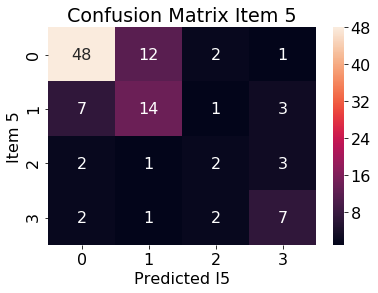

In [87]:
confusion_matrix_item5 = pd.crosstab(perla_df['I5'], 
                               perla_df['PI5'], 
                               rownames=['Item 5'], 
                               colnames=['Predicted I5'])
ax5 = plt.subplot()
sns.heatmap(confusion_matrix_item5, annot=True, ax = ax5)
ax5.set_title('Confusion Matrix Item 5');

In [88]:
acc5 = accuracy_score(perla_df['I5'], perla_df['PI5'])
print("The accuracy for item 5 is: " + str(acc5))

The accuracy for item 5 is: 0.6574074074074074


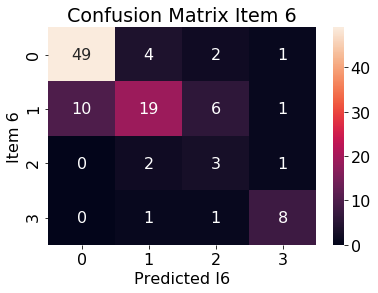

In [89]:
confusion_matrix_item6 = pd.crosstab(perla_df['I6'], 
                               perla_df['PI6'], 
                               rownames=['Item 6'], 
                               colnames=['Predicted I6'])
ax6 = plt.subplot()
sns.heatmap(confusion_matrix_item6, annot=True, ax = ax6)
ax6.set_title('Confusion Matrix Item 6');

In [90]:
acc6 = accuracy_score(perla_df['I6'], perla_df['PI6'])
print("The accuracy for item 6 is: " + str(acc6))

The accuracy for item 6 is: 0.7314814814814815


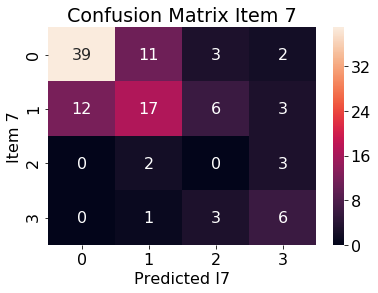

In [91]:
confusion_matrix_item7 = pd.crosstab(perla_df['I7'], 
                               perla_df['PI7'], 
                               rownames=['Item 7'], 
                               colnames=['Predicted I7'])
ax7 = plt.subplot()
sns.heatmap(confusion_matrix_item7, annot=True, ax = ax7)
ax7.set_title('Confusion Matrix Item 7');

In [92]:
acc7 = accuracy_score(perla_df['I7'], perla_df['PI7'])
print("The accuracy for item 7 is: " + str(acc7))

The accuracy for item 7 is: 0.5740740740740741


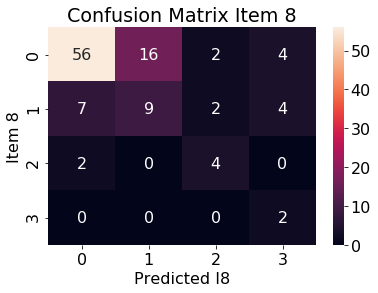

In [93]:
confusion_matrix_item8 = pd.crosstab(perla_df['I8'], 
                               perla_df['PI8'], 
                               rownames=['Item 8'], 
                               colnames=['Predicted I8'])
ax8 = plt.subplot()
sns.heatmap(confusion_matrix_item8, annot=True, ax = ax8)
ax8.set_title('Confusion Matrix Item 8');

In [94]:
acc8 = accuracy_score(perla_df['I8'], perla_df['PI8'])
print("The accuracy for item 8 is: " + str(acc8))

The accuracy for item 8 is: 0.6574074074074074


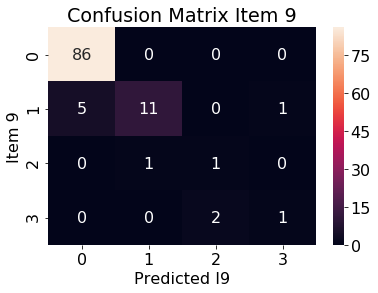

In [95]:
confusion_matrix_item9 = pd.crosstab(perla_df['I9'], 
                               perla_df['PI9'], 
                               rownames=['Item 9'], 
                               colnames=['Predicted I9'])
ax9 = plt.subplot()
sns.heatmap(confusion_matrix_item9, annot=True, ax = ax9)
ax9.set_title('Confusion Matrix Item 9');

In [96]:
acc9 = accuracy_score(perla_df['I9'], perla_df['PI9'])
print("The accuracy for item 9 is: " + str(acc9))

The accuracy for item 9 is: 0.9166666666666666


In [99]:
plt.rcParams.update({'font.size': 12})

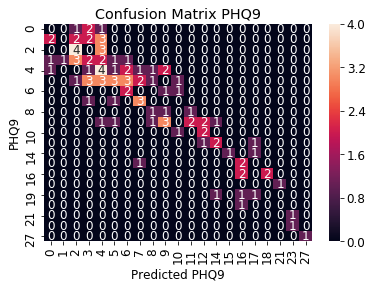

In [100]:
confusion_matrix_PHQ9 = pd.crosstab(perla_df['PHQ9'], 
                               perla_df['PPHQ9'], 
                               rownames=['PHQ9'], 
                               colnames=['Predicted PHQ9'])
ax10 = plt.subplot()
sns.heatmap(confusion_matrix_PHQ9, annot=True, ax = ax10)
ax10.set_title('Confusion Matrix PHQ9');

In [98]:
acc10 = accuracy_score(perla_df['PHQ9'], perla_df['PPHQ9'])
print("The accuracy for PHQ9 is: " + str(acc9))

The accuracy for PHQ9 is: 0.9166666666666666
